## Retrieval augmented generation
 
In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution. 

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc). 

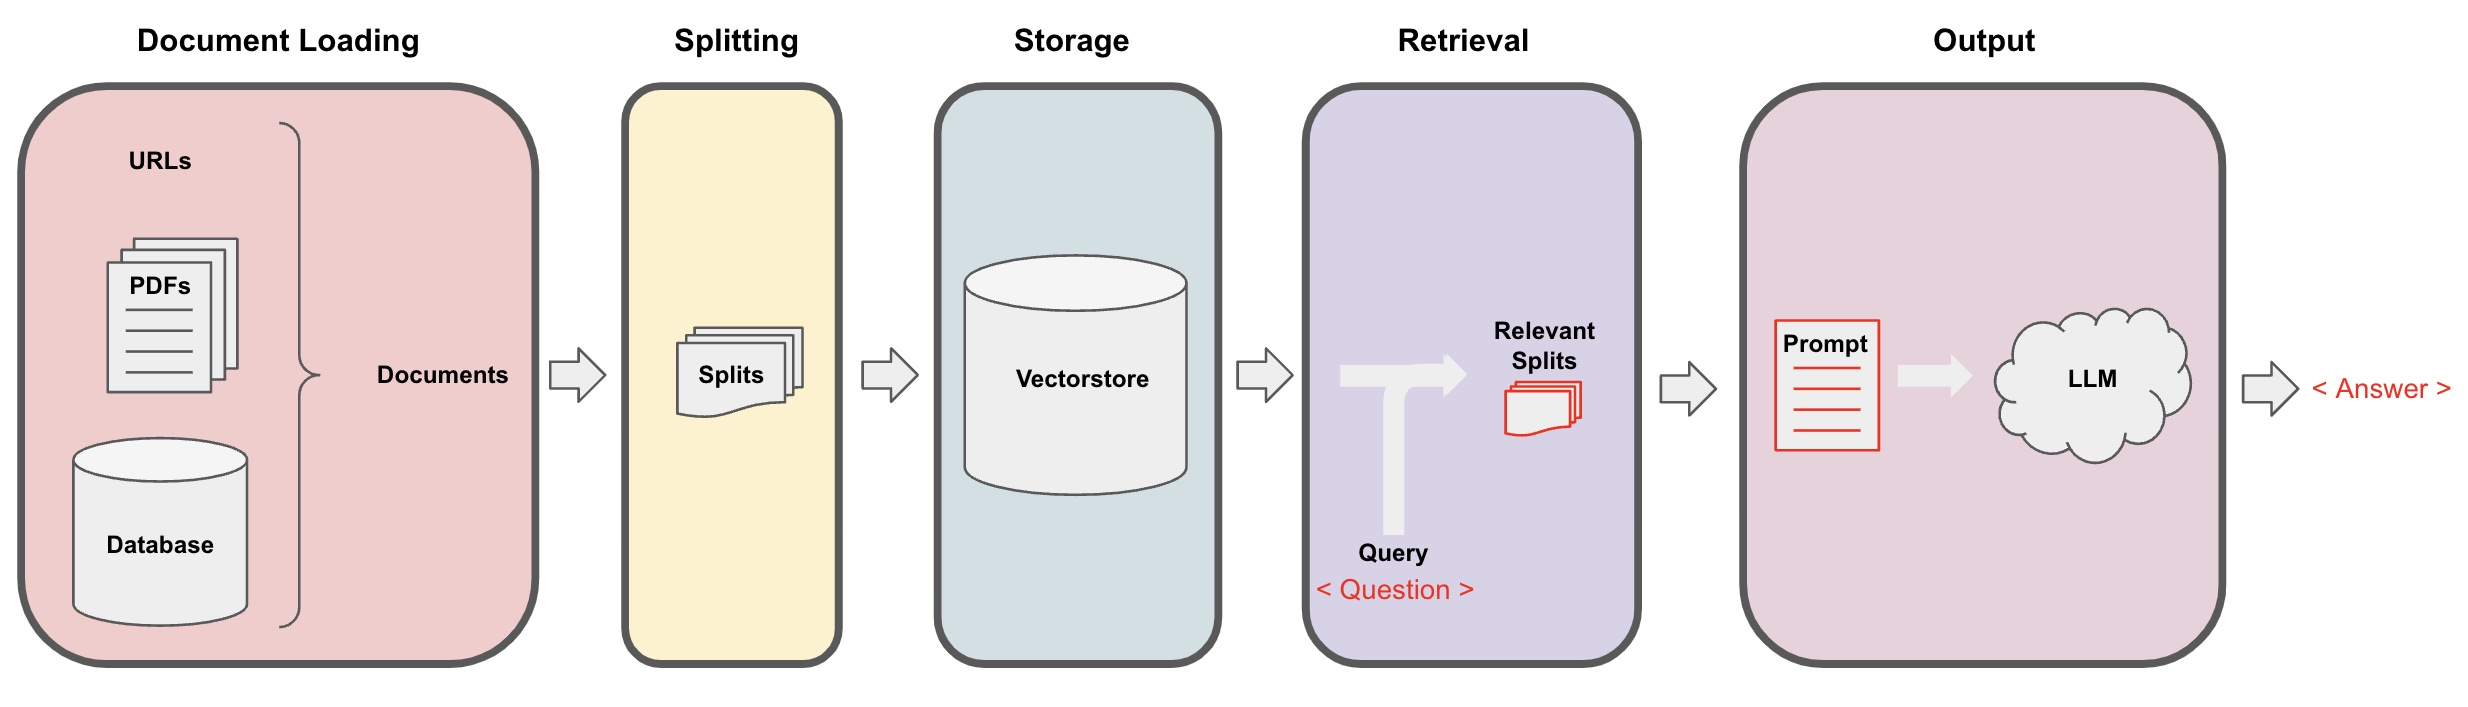

In [1]:
#! pip install langchain

In [2]:
import os
import openai

from dotenv import load_dotenv
load_dotenv() # read local .env file

api_key  = os.getenv("oapi_key")

## PDFs

Let's load a PDF [transcript](https://see.stanford.edu/materials/aimlcs229/transcripts/MachineLearning-Lecture01.pdf) from Andrew Ng's famous CS229 course! These documents are the result of automated transcription so words and sentences are sometimes split unexpectedly.

In [3]:
# ! pip install pypdf 

In [4]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("MachineLearning-Lecture01.pdf")
pages = loader.load()

Each page is a `Document`.

A `Document` contains 

* text (`page_content`) and 
* `metadata`.

In [5]:
len(pages)

22

In [6]:
page = pages[0]

In [7]:
print(page.page_content[0:500])

MachineLearning-Lecture01  
Instructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is ju st spend a little time going over the logistics 
of the class, and then we'll start to  talk a bit about machine learning.  
By way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so 
I personally work in machine learning, and I' ve worked on it for about 15 years now, and 
I actually think that machine learning i


In [8]:
page.metadata

{'source': 'MachineLearning-Lecture01.pdf', 'page': 0}

## YouTube

In [9]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser # Whisper is an OpenAI Audio to Text model
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [10]:
# ! pip install yt_dlp
# ! pip install pydub

**Note**: This can take several minutes to complete.

In [13]:
url="https://www.youtube.com/watch?v=jGwO_UgTS7I"

save_dir="./"
loader = GenericLoader(YoutubeAudioLoader([url],save_dir),
                       OpenAIWhisperParser(api_key=api_key))

In [14]:
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=jGwO_UgTS7I
[youtube] jGwO_UgTS7I: Downloading webpage
[youtube] jGwO_UgTS7I: Downloading ios player API JSON
[youtube] jGwO_UgTS7I: Downloading m3u8 information
[info] jGwO_UgTS7I: Downloading 1 format(s): 140
[download] Stanford CS229： Machine Learning Course, Lecture 1 - Andrew Ng (Autumn 2018).m4a has already been downloaded
[download] 100% of   69.76MiB
[ExtractAudio] Not converting audio Stanford CS229： Machine Learning Course, Lecture 1 - Andrew Ng (Autumn 2018).m4a; file is already in target format m4a
Transcribing part 1!
Transcribing part 2!
Transcribing part 3!
Transcribing part 4!


In [15]:
docs[0].page_content[0:500]

"Welcome to CS229 Machine Learning. Uh, some of you know that this is a class that's taught at Stanford for a long time. And this is often the class that, um, I most look forward to teaching each year because this is where we've helped, I think, several generations of Stanford students become experts in machine learning, got- built many of their products and services and startups that I'm sure, many of you or probably all of you are using, uh, uh, today. Um, so what I want to do today was spend s"

## URLs

In [16]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://github.com/basecamp/handbook/blob/master/benefits-and-perks.md")

In [17]:
docs = loader.load()

In [18]:
print(docs[0].page_content[:500])




















































































handbook/benefits-and-perks.md at master · basecamp/handbook · GitHub













































Skip to content












Navigation Menu

Toggle navigation










          Sign in
        


 













        Product
        












Actions
        Automate any workflow
      







Packages
        Host and manage packages
      







Security
        Find and fix vulnerabil


## Notion

Follow steps [here](https://python.langchain.com/docs/modules/data_connection/document_loaders/integrations/notion) for an example Notion site such as [this one](https://yolospace.notion.site/Blendle-s-Employee-Handbook-e31bff7da17346ee99f531087d8b133f):

* Duplicate the page into your own Notion space and export as `Markdown / CSV`.
* Unzip it and save it as a folder that contains the markdown file for the Notion page.
 

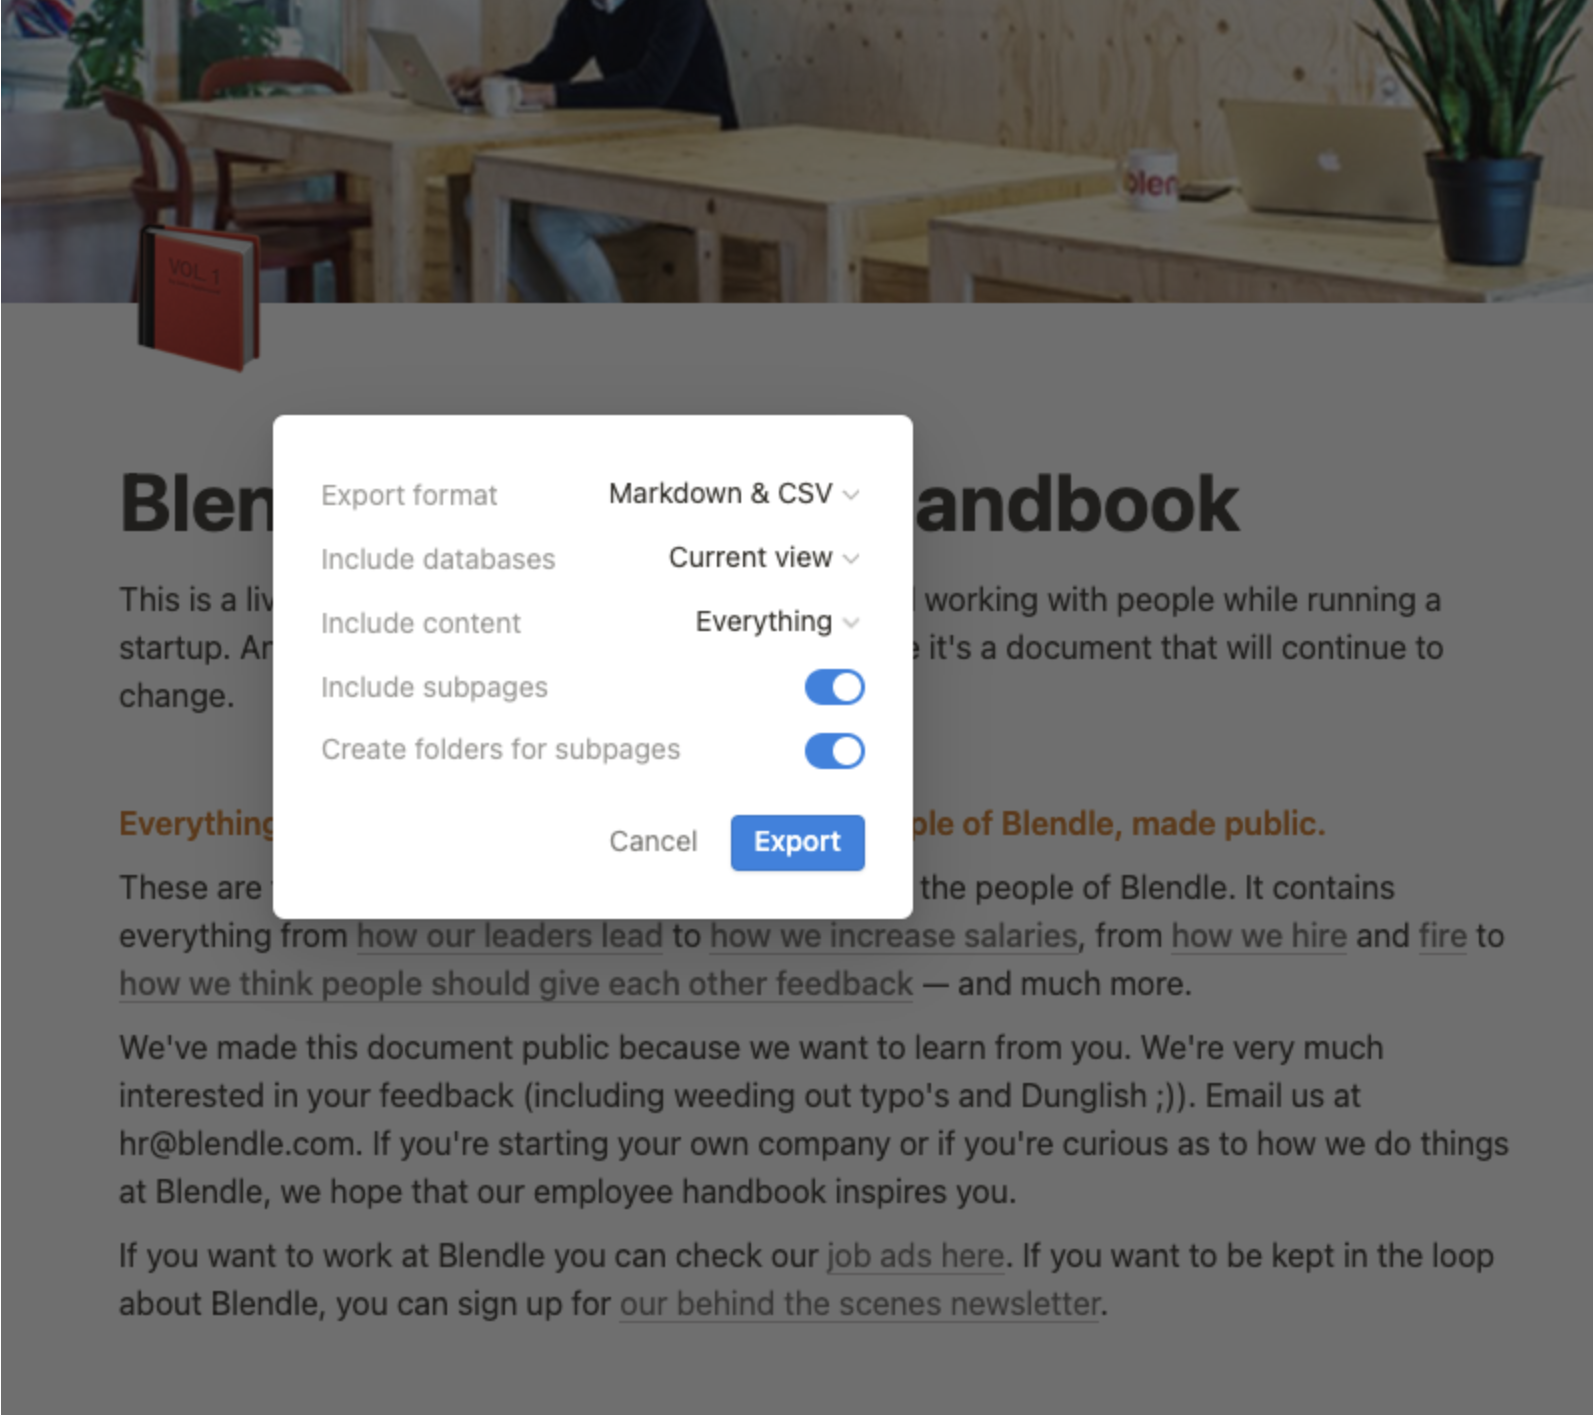

In [19]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("Notion_DB")
docs = loader.load()

In [20]:
print(docs[0].page_content[0:200])

# Blendle's Employee Handbook

This is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that


In [21]:
docs[0].metadata

{'source': "Notion_DB\\Blendle's Employee Handbook 0262940c25bc4f6b8c83c62652eb1037.md"}